In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statistics import mode
from scipy.stats import moment as mm
from google.colab import files
import io

In [ ]:
uploaded = files.upload()
uploaded1 = files.upload()

Saving stattricks_distribution.csv to stattricks_distribution (2).csv


Saving stattricks_distributionTeamStatinomicsW8.csv to stattricks_distributionTeamStatinomicsW8 (1).csv


In [ ]:
data = pd.read_csv(io.StringIO(uploaded['stattricks_distribution.csv'].decode('utf-8')))
dataTeam = pd.read_csv(io.StringIO(uploaded1['stattricks_distributionTeamStatinomicsW8.csv'].decode('utf-8')))

# Poisson

In [ ]:
def CentTend(data):
  df= pd.DataFrame(columns=['Mean-3SD', 'Mean-2SD', 'Mean-SD','Mean', 'Mode', 'Median', 'Var', 'Std', 'Mean+SD', 'Mean+2SD', 'Mean+3SD', 
                            'Moment1', 'Moment2', 'Moment3', 'Moment4'])
  df['Mean']=list(data.mean())
  df['Median']=list(data.median())
  df['Var']=list(data.var())
  df['Std']=list(data.std())
  a,f,g,h,j,k,l=[],[],[],[],[],[],[]
  b=data.columns
  for i in range(40):
    a.append(mode(data[b[i]]))
    f.append(df.Mean[i]-3*df.Std[i])
    g.append(df.Mean[i]-2*df.Std[i])
    h.append(df.Mean[i]-df.Std[i])
    j.append(df.Mean[i]+df.Std[i])
    k.append(df.Mean[i]+2*df.Std[i])
    l.append(df.Mean[i]+3*df.Std[i])
  df['Mode']=a
  df['Mean-3SD']=f
  df['Mean-2SD']=g
  df['Mean-SD']=h
  df['Mean+SD']=j
  df['Mean+2SD']=k
  df['Mean+3SD']=l
  df['Moment1']=mm(data,moment=1,nan_policy='omit')
  df['Moment2']=mm(data,moment=2,nan_policy='omit')
  df['Moment3']=mm(data,moment=3,nan_policy='omit')
  df['Moment4']=mm(data,moment=4,nan_policy='omit')
  return df

def PoissonImp(data,dataTeam):
  print("Description of data:\n",data.describe())
  df=CentTend(data)

  #Team
  print("Description of Team Data:\n",dataTeam.describe())
  dfTeam=CentTend(dataTeam)

  #Plot
  b=df.columns
  fig,axes = plt.subplots(nrows=5,ncols=3, figsize=(18,18))
  b1=b[0]
  i=0
  for j in range(5):
      for k in range(3):
        b1=b[i]
        df[b1].plot(ax=axes[j,k])
        dfTeam[b1].plot(ax=axes[j,k])
        axes[j,k].set_title(b1)
        i=i+1

  #Finding deviations
  dfDev=df.tail(5).reset_index()
  dfTeamDev=dfTeam.tail(5).reset_index()

  Dev=pd.DataFrame(columns=['Mean-3SD', 'Mean-2SD', 'Mean-SD','Mean', 'Mode', 'Median', 'Var', 'Std', 'Mean+SD', 'Mean+2SD', 'Mean+3SD', 
                            'Moment1', 'Moment2', 'Moment3', 'Moment4'])
  DevCol=Dev.columns
  for i in range(15):
    Dev[DevCol[i]]=((abs(dfTeamDev[DevCol[i]])-abs(dfDev[DevCol[i]]))/abs(dfDev[DevCol[i]]))*100
  Dev=Dev.abs()
  Dev=Dev.drop(['Moment1'], axis=1)
  print ("Total deviation percent for fifteen central tendencies is: ",Dev.values.sum())

Description of data:
                 D1           D2  ...         D39         D40
count  1000.000000  1000.000000  ...  804.000000  793.000000
mean      3.075000     3.739000  ...    5.863184    6.490542
std       1.424572     1.230607  ...    1.738492    1.541586
min       1.000000     1.000000  ...    1.000000    1.000000
25%       2.000000     3.000000  ...    5.000000    5.000000
50%       3.000000     4.000000  ...    6.000000    7.000000
75%       4.000000     5.000000  ...    8.000000    8.000000
max       5.000000     5.000000  ...    8.000000    8.000000

[8 rows x 40 columns]
Description of Team Data:
                 D1           D2  ...          D39          D40
count  1000.000000  1000.000000  ...  1000.000000  1000.000000
mean      3.075000     3.739000  ...     5.866000     6.501000
std       1.424572     1.230607  ...     1.639736     1.466339
min       1.000000     1.000000  ...     1.000000     1.000000
25%       2.000000     3.000000  ...     5.000000     6.000000
5

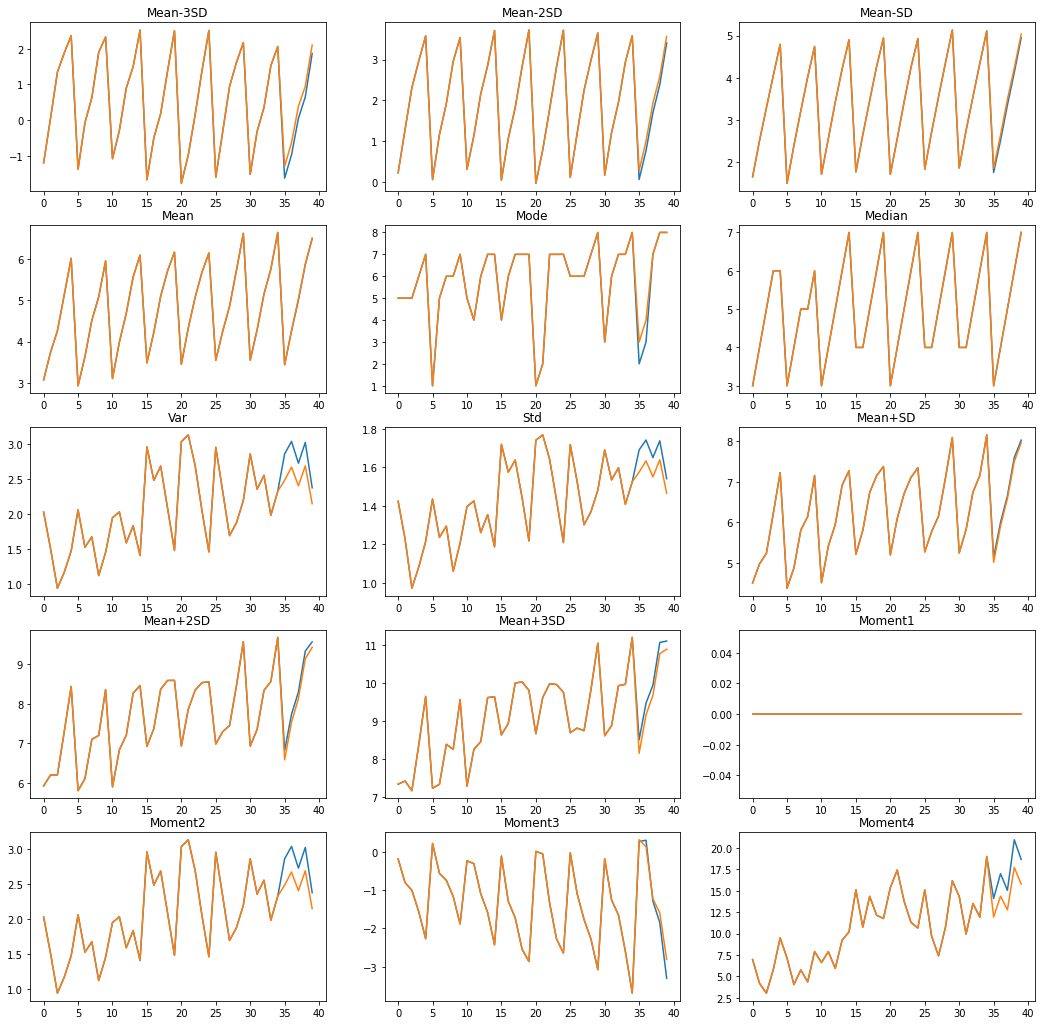

In [ ]:
PoissonImp(data,dataTeam)

# Normal

In [ ]:
def CentTendN(normal):
  Mean=normal.mean()
  Mode=mode(normal)
  Median=normal.median()
  Var=normal.var()
  Std=normal.std()
  MeanSD13=Mean-3*Std
  MeanSD12=Mean-2*Std
  MeanSD11=Mean-Std
  MeanSD21=Mean+Std
  MeanSD22=Mean+2*Std
  MeanSD23=Mean+3*Std
  Moment1=mm(normal,moment=1)
  Moment2=mm(normal,moment=2)
  Moment3=mm(normal,moment=3)
  Moment4=mm(normal,moment=4)
  print("Mean: ",Mean,"\nMode: ",Mode,"\nMedian: ",Median,"\nVar: ",Var,"\nStd: ",Std,"\nMean-3Std: ",MeanSD13,"\nMean-2Std: ",MeanSD12,
        "\nMean-Std: ",MeanSD11,"\nMean+Std: ",MeanSD21,"\nMean+2Std: ",MeanSD22,"\nMean+3Std: ",MeanSD23,"\nMoment1: ",Moment1,
        "\nMoment2: ",Moment2,"\nMoment3: ",Moment3,"\nMoment4: ",Moment4,'\n\n')
  return (Mean, Mode, Median, Var, Std, MeanSD13, MeanSD12, MeanSD11, MeanSD21, MeanSD22, MeanSD23, Moment1, 
          Moment2, Moment3, Moment4)
  
def NormalImp(data,dataTeam):
  normal=pd.Series(data.values.ravel('F'))
  normal=normal.dropna()
  print ("Data with missing values (before imputation):")
  Mean, Mode, Median, Var, Std, MeanSD13, MeanSD12, MeanSD11, MeanSD21, MeanSD22, MeanSD23, Moment1, Moment2, Moment3, Moment4 = CentTendN(normal)

  #Team
  normalTeam=pd.Series(dataTeam.values.ravel('F'))
  normalTeam=normalTeam.dropna()
  print ("Data without missing values (after imputation):")
  MeanTeam, ModeTeam, MedianTeam, VarTeam, StdTeam, MeanSD13Team, MeanSD12Team, MeanSD11Team, MeanSD21Team, MeanSD22Team, MeanSD23Team, Moment1Team, Moment2Team, Moment3Team, Moment4Team = CentTendN(normalTeam)

  #Plot
  d1=[Mean, Mode, Median, Var, Std, MeanSD13, MeanSD12, MeanSD11, MeanSD21, MeanSD22, MeanSD23, Moment1, Moment2, Moment3, Moment4]
  d2=[MeanTeam, ModeTeam, MedianTeam, VarTeam, StdTeam, MeanSD13Team, MeanSD12Team, MeanSD11Team, MeanSD21Team, MeanSD22Team, MeanSD23Team, Moment1Team, Moment2Team, Moment3Team, Moment4Team]
  xax=['Mean', 'Mode', 'Median', 'Var', 'Std', 'MeanSD13', 'MeanSD12', 'MeanSD11', 'MeanSD21', 'MeanSD22', 'MeanSD23', 'Moment1', 'Moment2',
       'Moment3', 'Moment4']
  #Plot
  plt.figure(figsize=(10,6))
  plt.bar(xax,d1)
  plt.title("Data")
  plt.show()

  plt.figure(figsize=(10,6))
  plt.bar(xax,d2)
  plt.title("Team Data")
  plt.show()


  #Finding Deviations
  Dev=pd.DataFrame(columns=['Mean-3SD', 'Mean-2SD', 'Mean-SD','Mean', 'Mode', 'Median', 'Var', 'Std', 'Mean+SD', 'Mean+2SD', 'Mean+3SD', 
                            'Moment1', 'Moment2', 'Moment3', 'Moment4'])
  dev=abs((abs(Mean)-abs(MeanTeam))/abs(Mean)+(abs(Mode)-abs(ModeTeam))/abs(Mode)+(abs(Median)-abs(MedianTeam))/abs(Median)+
          (abs(Var)-abs(VarTeam))/abs(Var)+(abs(Std)-abs(StdTeam))/abs(Std)+(abs(MeanSD13)-abs(MeanSD13Team))/abs(MeanSD13)+
          (abs(MeanSD12)-abs(MeanSD12Team))/abs(MeanSD12)+(abs(MeanSD11)-abs(MeanSD11Team))/abs(MeanSD11)+
          (abs(MeanSD21)-abs(MeanSD21Team))/abs(MeanSD21)+(abs(MeanSD22)-abs(MeanSD22Team))/abs(MeanSD22)+
          (abs(MeanSD23)-abs(MeanSD23Team))/abs(MeanSD23)+(abs(Moment2)-abs(Moment2Team))/abs(Moment2)
          +(abs(Moment3)-abs(Moment3Team))/abs(Moment3)+(abs(Moment4)-abs(Moment4Team))/abs(Moment4))
  print ("\n\nTotal Deviation is: ",dev)

Data with missing values (before imputation):
Mean:  4.805598954998335 
Mode:  5.0 
Median:  5.0 
Var:  3.255532402757626 
Std:  1.8043093977357725 
Mean-3Std:  -0.6073292382089823 
Mean-2Std:  1.1969801595267904 
Mean-Std:  3.001289557262563 
Mean+Std:  6.609908352734108 
Mean+2Std:  8.41421775046988 
Mean+3Std:  10.218527148205652 
Moment1:  0.0 
Moment2:  3.2554490195025325 
Moment3:  -1.9178492001057184 
Moment4:  23.886683129405302 


Data without missing values (after imputation):
Mean:  4.8132 
Mode:  5 
Median:  5.0 
Var:  3.235586649665899 
Std:  1.79877365159319 
Mean-3Std:  -0.5831209547795702 
Mean-2Std:  1.21565269681362 
Mean-Std:  3.0144263484068103 
Mean+Std:  6.61197365159319 
Mean+2Std:  8.41074730318638 
Mean+3Std:  10.20952095477957 
Moment1:  0.0 
Moment2:  3.23550576 
Moment3:  -1.8931543280640009 
Moment4:  23.69011439102047 




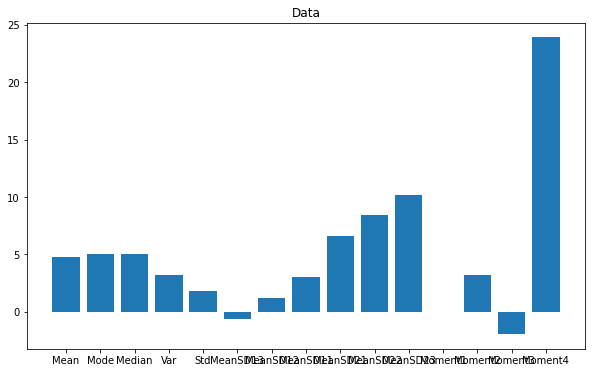

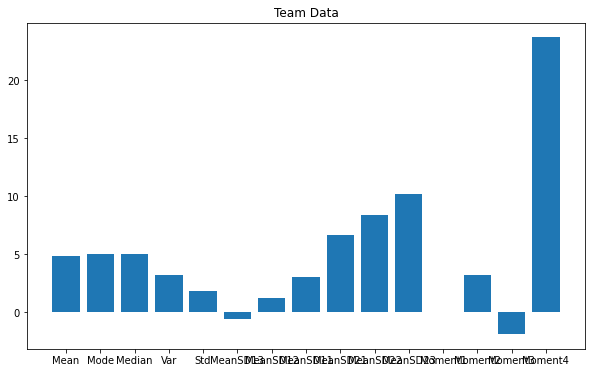



Total Deviation is:  0.05570959161616389


In [ ]:
NormalImp(data,dataTeam)